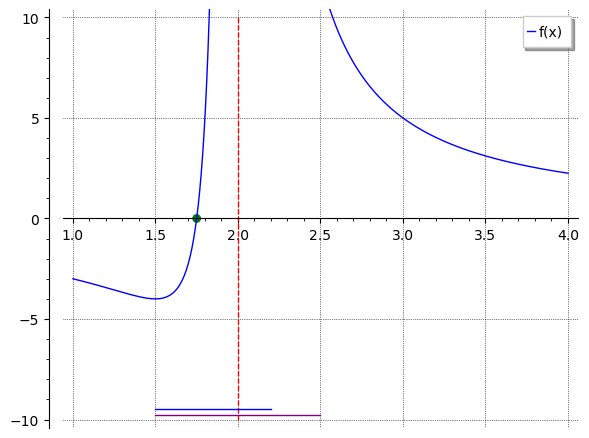

In [3]:
var('x')
f(x) = (4*x - 7)/(x - 2)^2

# Curva con detección de polos
g = plot(f, (x, 1.0, 4.0), detect_poles=True, ymin=-10, ymax=10, legend_label="f(x)")

# Asintota vertical x=2
asym = line([(2, -10), (2, 10)], color='red', linestyle='--')

# Raíz x=1.75 sobre el eje
root_pt = point((1.75, 0), size=40, color='green')

# Intervalos
seg_a = line([(1.5, -9.5), (2.2, -9.5)], color='blue')   # [1.5,2.2]
seg_b = line([(1.5, -9.8), (2.5, -9.8)], color='purple') # [1.5,2.5]

show(g + asym + root_pt + seg_a + seg_b, figsize=6, gridlines=True)


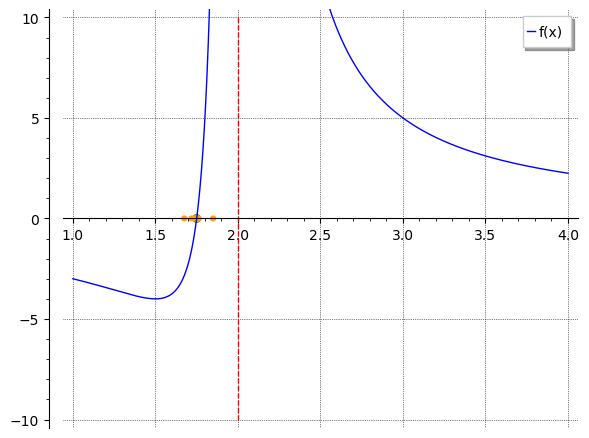

In [4]:
var('x')
f(x) = (4*x - 7)/(x - 2)^2

# Función que implementa bisección y guarda la convergencia
def bisection_points(f, a, b, tol=1e-5, max_iter=1000):
    points = []  # Para almacenar los puntos medios
    fa = f(a)
    fb = f(b)
    
    if fa * fb > 0:
        raise ValueError("Función no cambia de signo en el intervalo")

    iter_count = 0
    while (b - a)/2 > tol and iter_count < max_iter:
        c = (a + b)/2
        fc = f(c)
        points.append(c)  # Guardamos el punto medio
        iter_count += 1
        if fc == 0:
            break
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return points

# Obtener puntos de convergencia para el intervalo [1.5,2.2]
points_a = bisection_points(f, 1.5, 2.2)

# Graficar función con detección de polos
g = plot(f, (x, 1.0, 4.0), detect_poles=True, ymin=-10, ymax=10, legend_label="f(x)")

# Asintota vertical x=2
asym = line([(2, -10), (2, 10)], color='red', linestyle='--')

# Raíz aproximada x=1.75
root_pt = point((1.75, 0), size=40, color='green')

# Graficar puntos de convergencia
conv_points = sum([point((p, 0), size=20, color='orange') for p in points_a])

show(g + asym + root_pt + conv_points, figsize=6, gridlines=True)
